In [1]:
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df_clean = df.drop_duplicates().copy()
df_clean = df_clean.drop_duplicates(subset=['job_title','company_name','job_country'])
df_clean['job_skills'] = df_clean['job_skills'].apply(lambda skills:ast.literal_eval(skills)if pd.notna(skills)else skills)
df_DA_US = df_clean[(df_clean['job_title_short']=='Data Analyst') & (df_clean['job_country'] == 'United States')]
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

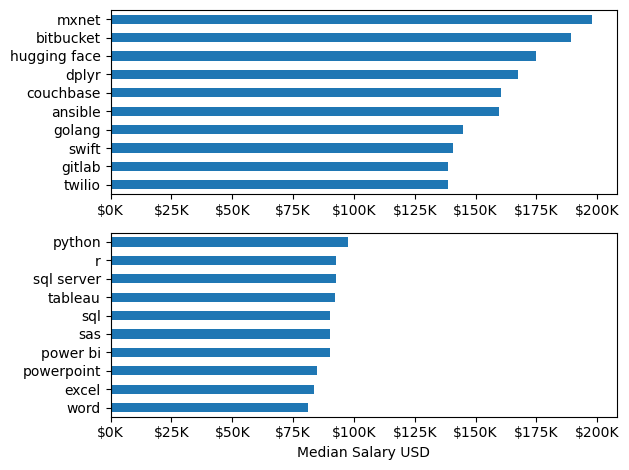

In [6]:
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US_group = df_DA_US.groupby('job_skills').agg(
    count = ('job_skills', 'size'),
    median_salary = ('salary_year_avg', 'median')
)

df_DA_top_pay = df_DA_US_group.sort_values('median_salary',ascending=False).head(10)

df_DA_skills = df_DA_US_group.sort_values('count',ascending=False).head(10).sort_values('median_salary',ascending=False)

fig, ax = plt.subplots(2, 1)

df_DA_top_pay.plot(kind='barh', y='median_salary', ax=ax[0], legend=False)
ax[0].invert_yaxis()
ax[0].set_ylabel('')
ax[0].legend().set_visible(False)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))


df_DA_skills.plot(kind='barh', y='median_salary', ax=ax[1])
ax[1].invert_yaxis()
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary USD')
ax[1].legend().set_visible(False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

fig.tight_layout()

In [7]:
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US_group = df_DA_US.groupby('job_skills').agg(
    count = ('job_skills', 'size'),
    median_salary = ('salary_year_avg', 'median')
)

df_DA_top_pay = df_DA_US_group.sort_values('median_salary',ascending=False).head(10)

df_DA_skills = df_DA_US_group.sort_values('count',ascending=False).head(10).sort_values('median_salary',ascending=False)



In [13]:
df_DA_top_pay, df_DA_skills

(              count  median_salary
 job_skills                        
 mxnet             1       198000.0
 bitbucket         2       189154.5
 hugging face      1       175000.0
 dplyr             1       167500.0
 couchbase         1       160515.0
 ansible           1       159640.0
 golang            1       145000.0
 swift             3       140500.0
 gitlab            2       138750.0
 twilio            2       138500.0,
             count  median_salary
 job_skills                      
 python        903        97500.0
 r             566        92527.5
 sql server    197        92500.0
 tableau       840        92279.0
 sql          1597        90000.0
 sas           590        90000.0
 power bi      525        90000.0
 powerpoint    306        85000.0
 excel        1211        83500.0
 word          329        81000.0)

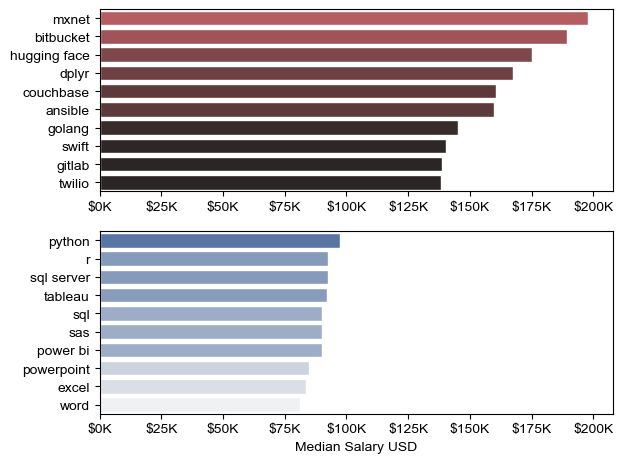

In [26]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')

sns.barplot(data=df_DA_top_pay, x='median_salary', y='job_skills', ax=ax[0], hue='median_salary', palette='dark:r')
ax[0].legend().remove()

#df_DA_top_pay.plot(kind='barh', y='median_salary', ax=ax[0], legend=False)
#ax[0].invert_yaxis()
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

sns.barplot(data=df_DA_skills, x='median_salary', y=df_DA_skills.index, ax=ax[1], hue='median_salary', palette='light:b')
#df_DA_skills.plot(kind='barh', y='median_salary', ax=ax[1])
#ax[1].invert_yaxis()
ax[1].set_ylabel('')
ax[1].legend().remove()
ax[1].set_xlabel('Median Salary USD')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

Text(0, 0.5, '')

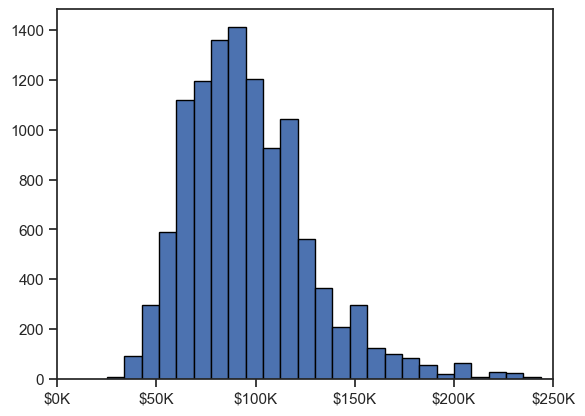

In [30]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
plt.xlim(0, 250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

plt.title('')
plt.xlabel('')
plt.ylabel('')

Text(12.444444444444445, 0.5, '')

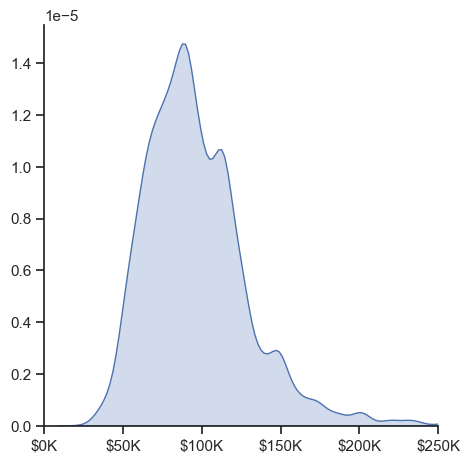

In [44]:
sns.set_theme(style='ticks')
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True)

plt.xlim(0, 250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

plt.title('')
plt.xlabel('')
plt.ylabel('')